# Comprehensive Comparison of Machine Learning Algorithms for Diabetes Prediction

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

### Importing the required libraries and modules:
1.  numpy and pandas for data manipulation.
1.  train_test_split from sklearn.model_selection for splitting data into training and testing sets.
1.  Classifiers from sklearn.ensemble, sklearn.tree, sklearn.neighbors, sklearn.naive_bayes, sklearn.linear_model, and sklearn.svm for various machine learning algorithms.
1.  accuracy_score from sklearn.metrics to evaluate model performance.
1.  StandardScaler from sklearn.preprocessing for feature scaling.
1.  SelectKBest and f_classif from sklearn.feature_selection for feature selection.

# Load the data

In [2]:
data = pd.read_csv("/kaggle/input/diabetes/diabetes.csv", encoding="ISO-8859-1")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Separate features and labels

In [3]:
X = data.drop("Outcome", axis=1)  # Assuming "Outcome" is the target column
y = data["Outcome"]

## These lines separate the dataset into two parts:
* X contains the feature columns, excluding the "Outcome" column (assumed to be the target).
* y contains the target column, which is "Outcome" in this case.

# Split the data into training and testing sets


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Spliting the data into training and testing sets using train_test_split:
* X_train and y_train represent the features and labels for the training set.
* X_test and y_test represent the features and labels for the testing set.
* test_size=0.2 specifies that 20% of the data should be used for testing, and random_state=42 sets a random seed for reproducibility.

# Scale the data

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Creating a StandardScaler object to scale the features. Feature scaling is crucial for some machine learning algorithms.
* X_train_scaled and X_test_scaled store the scaled training and testing data, respectively.

# Perform feature selection based on correlation


In [6]:
num_features_to_select = 5  # You can adjust this number as needed
selector = SelectKBest(score_func=f_classif, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

##### These lines perform feature selection based on correlation using the SelectKBest method with f_classif as the scoring function. It selects the top num_features_to_select features with the highest correlation with the target variable.
* X_train_selected and X_test_selected store the selected features for training and testing data.

# Increase max_iter for Logistic Regression

In [7]:
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
lr_model = LogisticRegression(max_iter=1000)
svm_model = SVC()

# In these lines, we're initializing various machine learning models for classification:
* rf_model: A Random Forest Classifier.
* dt_model: A Decision Tree Classifier.
* knn_model: A K-Nearest Neighbors Classifier.
* nb_model: A Gaussian Naive Bayes Classifier.
* lr_model: A Logistic Regression Classifier with an increased max_iter parameter set to 1000 to avoid convergence issues.
* svm_model: A Support Vector Machine Classifier.

# Train the models

In [8]:
rf_model.fit(X_train_selected, y_train)
dt_model.fit(X_train_selected, y_train)
knn_model.fit(X_train_selected, y_train)
nb_model.fit(X_train_selected, y_train)
lr_model.fit(X_train_selected, y_train)
svm_model.fit(X_train_selected, y_train)

SVC()

##### These lines train each of the machine learning models using the training data (X_train_selected and y_train) that have been preprocessed and feature-selected.
##### Each model learns to make predictions based on the selected features and the corresponding target labels.

# Make predictions with the models

In [9]:
rf_pred = rf_model.predict(X_test_selected)
dt_pred = dt_model.predict(X_test_selected)
knn_pred = knn_model.predict(X_test_selected)
nb_pred = nb_model.predict(X_test_selected)
lr_pred = lr_model.predict(X_test_selected)
svm_pred = svm_model.predict(X_test_selected)

##### These lines use the trained models to make predictions on the testing data (X_test_selected) to evaluate their performance.
##### Predictions are stored in variables like rf_pred, dt_pred, knn_pred, nb_pred, lr_pred, and svm_pred.

# Evaluate the model performance


In [10]:
rf_accuracy = accuracy_score(y_test, rf_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

##### These lines calculate the accuracy of each model's predictions on the testing data using the accuracy_score function.
##### The accuracy scores are stored in variables like rf_accuracy, dt_accuracy, knn_accuracy, nb_accuracy, lr_accuracy, and svm_accuracy.

# Print the accuracy of each model

In [11]:
print("Random Forest Accuracy:", rf_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)

Random Forest Accuracy: 0.7792207792207793
Decision Tree Accuracy: 0.7207792207792207
K-Nearest Neighbors Accuracy: 0.7337662337662337
Naive Bayes Accuracy: 0.7532467532467533
Logistic Regression Accuracy: 0.7532467532467533
Support Vector Machine Accuracy: 0.7662337662337663


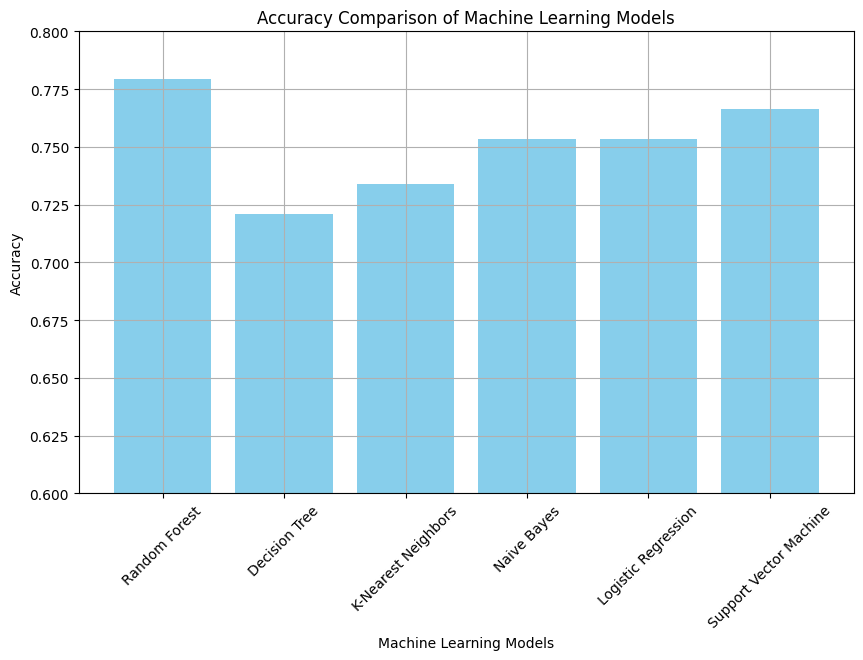

In [12]:
# List of model names for the x-axis
model_names = ["Random Forest", "Decision Tree", "K-Nearest Neighbors", "Naive Bayes", "Logistic Regression", "Support Vector Machine"]
# List of accuracy scores for the y-axis
accuracy_scores = [rf_accuracy, dt_accuracy, knn_accuracy, nb_accuracy, lr_accuracy, svm_accuracy]
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Machine Learning Models')
plt.ylim(0.6, 0.8)  # Adjust the y-axis limits as needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()
plt.show()

##### Finally, these lines print the accuracy of each model on the testing data. This provides you with a clear evaluation of how well each machine learning algorithm performed in predicting diabetes. The printed accuracies give you insights into the relative performance of each model.